# Web Scraping & Data Handling

# Task 1:- Web Scrapping

# Scrapping Movies Data

In [40]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [41]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

In [42]:
# Write Your Code here
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)
print(url_list)

['https://www.justwatch.com/in/movie/stree-2', 'https://www.justwatch.com/in/movie/the-substance', 'https://www.justwatch.com/in/movie/deadpool-3', 'https://www.justwatch.com/in/movie/bhool-bhulaiyaa-3', 'https://www.justwatch.com/in/movie/meiyazhagan', 'https://www.justwatch.com/in/movie/venom-3-2024', 'https://www.justwatch.com/in/movie/vettaiyan', 'https://www.justwatch.com/in/movie/ntr-30', 'https://www.justwatch.com/in/movie/the-wild-robot', 'https://www.justwatch.com/in/movie/do-patti', 'https://www.justwatch.com/in/movie/khel-khel-mein', 'https://www.justwatch.com/in/movie/alien-romulus', 'https://www.justwatch.com/in/movie/longlegs', 'https://www.justwatch.com/in/movie/siddharth-roy', 'https://www.justwatch.com/in/movie/thalapathy-68', 'https://www.justwatch.com/in/movie/kill-2024', 'https://www.justwatch.com/in/movie/lubber-pandhu', 'https://www.justwatch.com/in/movie/vedaa', 'https://www.justwatch.com/in/movie/level-cross', 'https://www.justwatch.com/in/movie/untitled-soorara

In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 4: Function to fetch movie details
def fetch_movie_details(movie_url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(movie_url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract movie details
    title = soup.find('h1', class_="title-detail-hero__details__title").text[:-6]
    release_year = soup.find('span', class_="release-year").text
    imdb_rating_element = soup.find('div', class_="jw-scoring-listing__rating--group jw-scoring-listing__rating--link")
    imdb_rating = imdb_rating_element.text[:-7] if imdb_rating_element else "N/A"
    platform_name = soup.find("img", class_="offer__icon")["alt"] if soup.find("img", class_="offer__icon") else None

    # Initialize a dictionary to store extracted information
    movie_details = {
        "movie_title": title,
        "release_year": release_year,
        "imdb_rating": imdb_rating,
        "streaming_on": platform_name,
        "genres": "",
        "runtime": "",
        "age_rating": "",
        "production_country": ""
    }


    # Extract additional details like genres, runtime, age rating, production country
    for detail in soup.find_all("div", class_="detail-infos"):
        subheading = detail.find("h3", class_="detail-infos__subheading").text.strip()
        value = detail.find("div", class_="detail-infos__value").text.strip()

        if subheading == "Genres":
            movie_details["genres"] = value
        elif subheading == "Runtime":
            movie_details["runtime"] = value
        elif subheading == "Age rating":
            movie_details["age_rating"] = value
        elif subheading == "Production country":
            movie_details["production_country"] = value

    return movie_details

# Initialize a DataFrame to store all movie details
movie_df = pd.DataFrame(columns=['movie_title', 'release_year', 'imdb_rating', 'genres', 'runtime', 'age_rating', 'production_country'])


# Test the function on each movie URL and append results to DataFrame
for movie_url in url_list:
    movie_details = fetch_movie_details(movie_url)
    movie_df = pd.concat([movie_df, pd.DataFrame([movie_details])], ignore_index=True, axis =0)



In [44]:
movie_df.head(5)

,movie_title,release_year,imdb_rating,genres,runtime,age_rating,production_country,streaming_on
0,Stree 2: Sarkate Ka Aatank,(2024),7.1,"Comedy, Horror",2h 27min,UA,India,Amazon Prime Video
1,The Substance,(2024),7.5,"Drama, Horror, Science-Fiction",2h 21min,,"United Kingdom, France",MUBI
2,Deadpool & Wolverine,(2024),7.7,"Comedy, Science-Fiction, Action & Adventure",2h 8min,A,United States,Apple TV
3,Bhool Bhulaiyaa 3,(2024),5.8,"Comedy, Horror",2h 38min,UA,India,Bookmyshow
4,Meiyazhagan,(2024),8.,"Drama, Kids & Family",2h 57min,U,India,Netflix


# Scraping TV Show Data

In [45]:
def fetch_tv_url(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup=fetch_tv_url(tv_url)
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

In [46]:
# Write Your Code here
tv_links = soup.find_all('a', href=True)
tv_urls = [link['href'] for link in tv_links if '/tv-show/' in link['href']]

tv_url_list = []
for x in tv_urls:
  tv_url_list.append('https://www.justwatch.com'+x)

print(tv_url_list)


['https://www.justwatch.com/in/tv-show/from', 'https://www.justwatch.com/in/tv-show/the-penguin', 'https://www.justwatch.com/in/tv-show/taaza-khabar', 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/bigg-boss', 'https://www.justwatch.com/in/tv-show/citadel-honey-bunny', 'https://www.justwatch.com/in/tv-show/agatha-house-of-harkness', 'https://www.justwatch.com/in/tv-show/dont-come-home', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/hellbound', 'https://www.justwatch.com/in/tv-show/dan-da-dan', 'https://www.justwatch.com/in/tv-show/nobody-wants-this', 'https://www.justwatch.com/in/tv-show/sweetpea', 'https://www.justwatch.com/in/tv-show/tulsa-king', 'https://www.justwatch.com/in/tv-show/teacup', 'https://www.justwatch.com/in/tv-show/the-diplomat', 'https://www.justwatch.com/in/tv-show/1000-babies', 'https://www.justwatch.com/in/tv-show/panchaya

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 4: Function to fetch TV show details
def fetch_tv_details(tv_url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(tv_url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract main details
    tv_title = soup.find('h1', class_="title-detail-hero__details__title").text[:-6]
    release_year = soup.find('span', class_="release-year").text
    imdb_rating_element = soup.find('div', class_="jw-scoring-listing__rating--group jw-scoring-listing__rating--link")
    imdb_rating = imdb_rating_element.text[:-7] if imdb_rating_element else "N/A"
    platform_name = soup.find("img", class_="offer__icon")["alt"] if soup.find("img", class_="offer__icon") else None


    # Initialize a dictionary to store extracted information
    tv_details = {
        "tv_title": tv_title,
        "release_year": release_year,
        "imdb_rating": imdb_rating,
        "streaming_on": platform_name,
        "genres": "",
        "runtime": "",
        "age_rating": "",
        "production_country": ""
    }

    # Extract additional details like genres, runtime, age rating, production country
    for detail in soup.find_all("div", class_="detail-infos"):
        subheading = detail.find("h3", class_="detail-infos__subheading").text.strip()
        value = detail.find("div", class_="detail-infos__value").text.strip()

        if subheading == "Genres":
            tv_details["genres"] = value
        elif subheading == "Runtime":
            tv_details["runtime"] = value
        elif subheading == "Age rating":
            tv_details["age_rating"] = value
        elif subheading == "Production country":
            tv_details["production_country"] = value

    return tv_details

# Initialize a DataFrame to store all TV details
tv_df = pd.DataFrame(columns=['tv_title', 'release_year', 'imdb_rating', 'genres', 'runtime', 'age_rating', 'production_country'])


# Test the function on each TV show URL and append results to DataFrame
for tv_url in tv_url_list:
    tv_details = fetch_tv_details(tv_url)
    tv_df = pd.concat([tv_df, pd.DataFrame([tv_details])], ignore_index=True)



In [48]:
tv_df.head(5)

,tv_title,release_year,imdb_rating,genres,runtime,age_rating,production_country,streaming_on
0,From,(2022),7.8,"Drama, Horror, Science-Fiction, Mystery & Thri...",50min,,United States,Amazon Prime Video
1,The Penguin,(2024),8.8,"Crime, Drama, Fantasy",55min,,United States,Jio Cinema
2,Taaza Khabar,(2023),8.1,"Drama, Science-Fiction, Fantasy, Mystery & Thr...",32min,,India,Hotstar
3,XXX: Uncensored,(2018),,"Comedy, Romance, Drama",22min,,India,Alt Balaji
4,Mirzapur,(2018),8.4,"Drama, Action & Adventure, Mystery & Thriller,...",50min,A,India,Amazon Prime Video


# Task 2 :- Data Filtering & Analysis

## Data Filtering for movie_df

In [49]:
#getting the columns for each dataframes
movie_df.columns, tv_df.columns

(Index(['movie_title', 'release_year', 'imdb_rating', 'genres', 'runtime',
        'age_rating', 'production_country', 'streaming_on'],
       dtype='object'),
 Index(['tv_title', 'release_year', 'imdb_rating', 'genres', 'runtime',
        'age_rating', 'production_country', 'streaming_on'],
       dtype='object'))

In [50]:
#checking datatype of movie_df
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie_title         110 non-null    object
 1   release_year        110 non-null    object
 2   imdb_rating         110 non-null    object
 3   genres              110 non-null    object
 4   runtime             110 non-null    object
 5   age_rating          110 non-null    object
 6   production_country  110 non-null    object
 7   streaming_on        103 non-null    object
dtypes: object(8)
memory usage: 7.0+ KB


In [51]:
#coverting into suitable datatype
movie_df['imdb_rating'] = pd.to_numeric(movie_df['imdb_rating'], errors='coerce')

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         110 non-null    object 
 1   release_year        110 non-null    object 
 2   imdb_rating         101 non-null    float64
 3   genres              110 non-null    object 
 4   runtime             110 non-null    object 
 5   age_rating          110 non-null    object 
 6   production_country  110 non-null    object 
 7   streaming_on        103 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.0+ KB


In [56]:
#handling missing values in imdb rating
movie_df['imdb_rating'].fillna(0, inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         110 non-null    object 
 1   release_year        110 non-null    object 
 2   imdb_rating         110 non-null    float64
 3   genres              110 non-null    object 
 4   runtime             110 non-null    object 
 5   age_rating          110 non-null    object 
 6   production_country  110 non-null    object 
 7   streaming_on        103 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.0+ KB


<ipython-input-56-298338b2f1bb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df['imdb_rating'].fillna(0, inplace=True)


## Data Filtering for tv_df

In [57]:
tv_df.head()

,tv_title,release_year,imdb_rating,genres,runtime,age_rating,production_country,streaming_on
0,From,(2022),7.8,"Drama, Horror, Science-Fiction, Mystery & Thri...",50min,,United States,Amazon Prime Video
1,The Penguin,(2024),8.8,"Crime, Drama, Fantasy",55min,,United States,Jio Cinema
2,Taaza Khabar,(2023),8.1,"Drama, Science-Fiction, Fantasy, Mystery & Thr...",32min,,India,Hotstar
3,XXX: Uncensored,(2018),,"Comedy, Romance, Drama",22min,,India,Alt Balaji
4,Mirzapur,(2018),8.4,"Drama, Action & Adventure, Mystery & Thriller,...",50min,A,India,Amazon Prime Video


In [58]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tv_title            110 non-null    object
 1   release_year        110 non-null    object
 2   imdb_rating         110 non-null    object
 3   genres              110 non-null    object
 4   runtime             110 non-null    object
 5   age_rating          110 non-null    object
 6   production_country  110 non-null    object
 7   streaming_on        97 non-null     object
dtypes: object(8)
memory usage: 7.0+ KB


In [59]:
#converting into suitable datatype
tv_df['imdb_rating'] = pd.to_numeric(tv_df['imdb_rating'],errors='coerce')
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tv_title            110 non-null    object 
 1   release_year        110 non-null    object 
 2   imdb_rating         94 non-null     float64
 3   genres              110 non-null    object 
 4   runtime             110 non-null    object 
 5   age_rating          110 non-null    object 
 6   production_country  110 non-null    object 
 7   streaming_on        97 non-null     object 
dtypes: float64(1), object(7)
memory usage: 7.0+ KB


In [61]:
#handling missing values
tv_df['imdb_rating'].fillna(0,inplace = True)
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tv_title            110 non-null    object 
 1   release_year        110 non-null    object 
 2   imdb_rating         110 non-null    float64
 3   genres              110 non-null    object 
 4   runtime             110 non-null    object 
 5   age_rating          110 non-null    object 
 6   production_country  110 non-null    object 
 7   streaming_on        97 non-null     object 
dtypes: float64(1), object(7)
memory usage: 7.0+ KB


<ipython-input-61-cda8650732f4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tv_df['imdb_rating'].fillna(0,inplace = True)


# Data Analysis

##  Calculating Mean IMDB Ratings for both Movies and Tv Shows

#### For Movie.df

In [63]:
mean_value_imdb_movie = round(np.mean(movie_df.loc[:, 'imdb_rating']),1)
print(" Mean Value for IMDB Movie Rating is : ", mean_value_imdb_movie)

 Mean Value for IMDB Movie Rating is :  6.3


#### For Tv.df

In [65]:
mean_value_imdb_tv = round(np.mean(tv_df.loc[:, 'imdb_rating']),1)
print(" Mean Value for IMDB TV Show Rating is : ", mean_value_imdb_tv)

 Mean Value for IMDB TV Show Rating is :  6.6


## Analyzing Top Genres

In [66]:
#importing libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

### For movies data

In [67]:
# Step 1: Concatenate all genres into a single string
all_genres = ', '.join(movie_df['genres'].dropna())
all_genres

'Comedy, Horror, Drama, Horror, Science-Fiction, Comedy, Science-Fiction, Action & Adventure, Comedy, Horror, Drama, Kids & Family, Action & Adventure, Science-Fiction, Mystery & Thriller, Drama, Action & Adventure, Crime, Mystery & Thriller, Action & Adventure, Drama, Animation, Science-Fiction, Kids & Family, Mystery & Thriller, Drama, Crime, Comedy, Drama, Science-Fiction, Horror, Mystery & Thriller, Mystery & Thriller, Horror, Crime, Drama, Romance, Mystery & Thriller, Action & Adventure, Drama, Crime, Drama, Mystery & Thriller, Action & Adventure, Sport, Comedy, Drama, Kids & Family, Romance, Drama, Mystery & Thriller, Action & Adventure, Drama, Mystery & Thriller, Drama, Fantasy, Horror, Mystery & Thriller, Drama, Made in Europe, Action & Adventure, Science-Fiction, Mystery & Thriller, Mystery & Thriller, Science-Fiction, Horror, Science-Fiction, Action & Adventure, Drama, Mystery & Thriller, Drama, Kids & Family, Comedy, Fantasy, Science-Fiction, Crime, Comedy, Mystery & Thrille

In [68]:
# Step 2: Split the genres and count occurrences
genre_counts = Counter(all_genres.split(', '))
genre_counts

Counter({'Comedy': 32,
         'Horror': 22,
         'Drama': 68,
         'Science-Fiction': 20,
         'Action & Adventure': 41,
         'Kids & Family': 9,
         'Mystery & Thriller': 51,
         'Crime': 26,
         'Animation': 6,
         'Romance': 12,
         'Sport': 4,
         'Fantasy': 9,
         'Made in Europe': 2,
         'History': 2,
         'War & Military': 2,
         'Documentary': 1,
         'Reality TV': 1})

In [69]:
# Step 3: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)
wordcloud

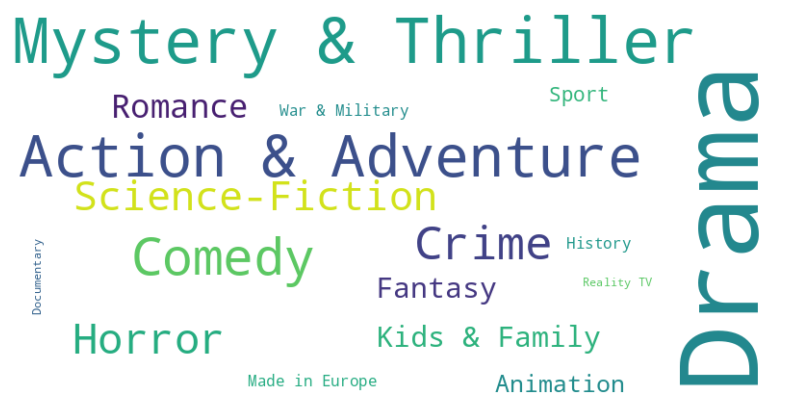

In [70]:
# Step 4: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### For Tv Shows data

In [72]:
# step 1
all_tv_genres = ','.join(tv_df['genres'].dropna())
all_tv_genres

'Drama, Horror, Science-Fiction, Mystery & Thriller,Crime, Drama, Fantasy,Drama, Science-Fiction, Fantasy, Mystery & Thriller, Action & Adventure, Comedy,Comedy, Romance, Drama,Drama, Action & Adventure, Mystery & Thriller, Crime,Reality TV, Kids & Family,Action & Adventure, Drama, Science-Fiction, Mystery & Thriller,Science-Fiction, Mystery & Thriller, Action & Adventure, Comedy, Drama, Fantasy,Mystery & Thriller, Science-Fiction, Drama, Horror,Science-Fiction, Drama, Action & Adventure, Fantasy,Drama, Crime, Science-Fiction, Mystery & Thriller, Fantasy, Horror,Action & Adventure, Science-Fiction, Animation, Comedy, Fantasy, Romance, Mystery & Thriller,Romance, Comedy, Drama,Drama, Comedy,Drama, Crime,Science-Fiction, Drama, Mystery & Thriller, Horror,Drama, Mystery & Thriller, War & Military,Crime, Drama, Horror,Drama, Comedy,Animation, Action & Adventure, Kids & Family, Fantasy,Crime, Drama, Comedy, Action & Adventure,Comedy, Drama, Fantasy,Drama, Mystery & Thriller, Comedy, Crime,D

In [73]:
# step 2 - count the freq of the genres available
tv_genre_counts = Counter(all_tv_genres.split(','))
tv_genre_counts

Counter({'Drama': 40,
         ' Horror': 13,
         ' Science-Fiction': 22,
         ' Mystery & Thriller': 42,
         'Crime': 14,
         ' Drama': 46,
         ' Fantasy': 27,
         ' Action & Adventure': 30,
         ' Comedy': 21,
         'Comedy': 14,
         ' Romance': 15,
         ' Crime': 24,
         'Reality TV': 2,
         ' Kids & Family': 4,
         'Action & Adventure': 10,
         'Science-Fiction': 13,
         'Mystery & Thriller': 6,
         ' Animation': 11,
         'Romance': 2,
         ' War & Military': 4,
         'Animation': 3,
         'Western': 1,
         ' History': 2,
         ' Made in Europe': 2,
         'War & Military': 2,
         'Fantasy': 1,
         'Documentary': 1,
         ' Documentary': 1,
         'Kids & Family': 1})

In [75]:
# step 3 - generate word cloud
wordcloud2  = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tv_genre_counts)


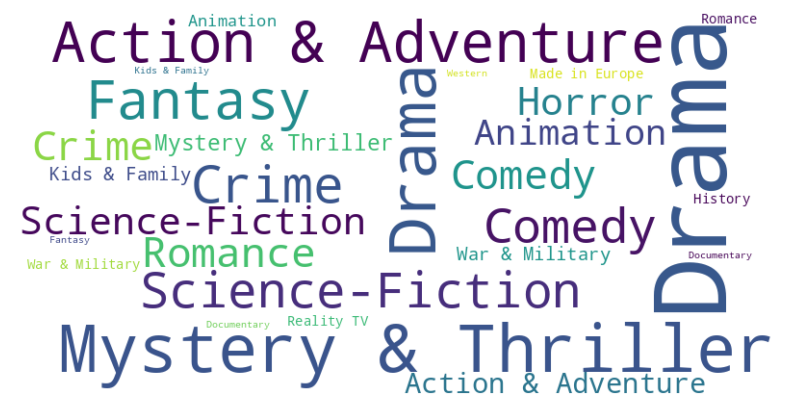

In [76]:
# Step 4: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2 , interpolation='bilinear')
plt.axis('off')
plt.show()

## Finding Predominant Streaming Service

## For Movies data

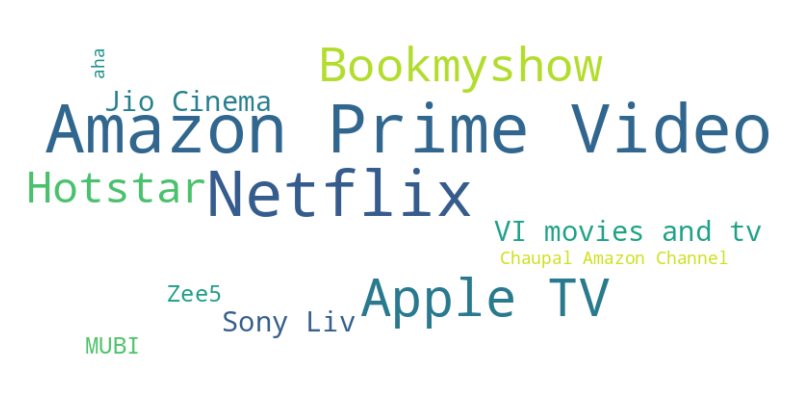

In [77]:
# step 1
all_platforms = ', '.join(movie_df['streaming_on'].dropna())

# step2
platform_counts = Counter(all_platforms.split(', '))

# step3
wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(platform_counts)

# step4
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

## For TV Shows data

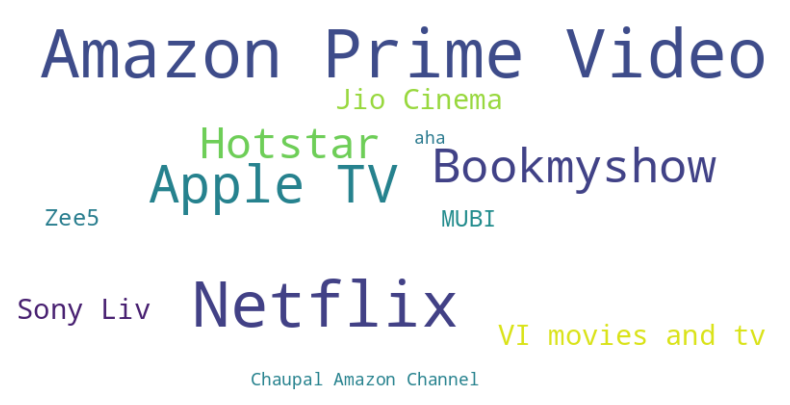

In [79]:
# step1
all_tv_platforms = ','.join(tv_df['streaming_on'].dropna())

# step2
tv_platform_counts = Counter(all_tv_platforms.split(','))

# step3
wordcloud4 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(platform_counts)

# step4
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

# Task 3 :- Data Export

In [80]:
movie_df.to_csv('Movies Dataframe.csv')

In [81]:
tv_df.to_csv('TV Show Dataframe.csv')

# MOVIE DF

https://drive.google.com/file/d/1zpwtKV6iGtvPqtLQ_qu5wT21gGvPQ2UP/view?usp=sharing

# TV SHOW DF

https://drive.google.com/file/d/1xzYMU1OAeC_kfcNB9K_-Sk45l-oHLx58/view?usp=sharing